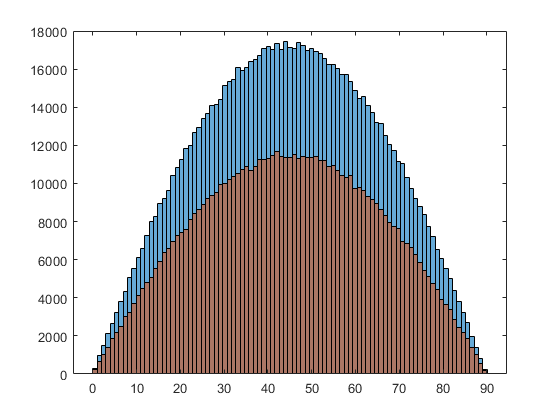

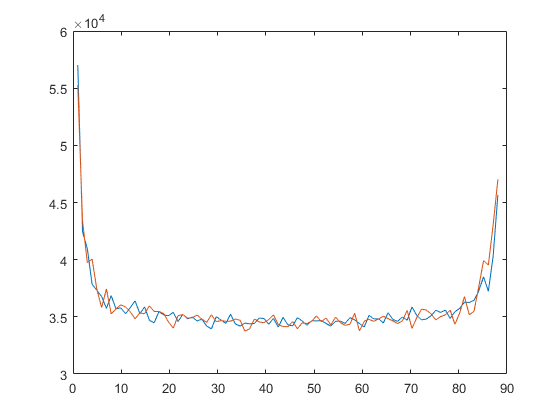

In [161]:
alpha = 0:1:90;
mu = cosd(alpha);
B_l = 1.5;
B_eq = 1;

f = ones(1,length(alpha)).*cosd(alpha).*sind(alpha);
alpha_eq = randpdf(f, alpha, [1,1000000]);
h1 = histogram(alpha_eq,length(alpha),'Normalization','count');

a_Lambda = @(a_eq) rad2deg(asin(sind(a_eq).*(B_l./B_eq).^0.5));
alpha_lambda = a_Lambda(alpha_eq);
hold on;
h2=histogram(alpha_lambda(imag(alpha_lambda)==0),length(alpha),'Normalization','count');

figure;
plot(h1.BinEdges(1:end-1),h1.Values.*B_eq./(cosd(alpha).*sind(alpha)))
hold on;
plot(h2.BinEdges(1:end-1),h2.Values.*B_l./(cosd(alpha).*sind(alpha)))



In [136]:
alpha_eq(1)



ans =

   NaN




In [7]:
%%file randpdf.m
function x=randpdf(p,px,dim)
% RANDPDF
%   Random numbers from a user defined distribution
%
% SYNTAX:
%   x = randpdf(p, px, dim)
%       randpdf(p, px, dim)
% 
% INPUT:
%   p   - probability density,
%   px  - values for probability density,
%   dim - dimension for the output matrix.
%
% OUTPUT:
%   x   - random numbers. Run function without output for some plots.
%
% DESCRIPTION:
%   x = randpdf(p, px, dim) returns the matrix of random numbers from
%   probability density distribution defined in p and px. p are the density
%   (the y axis) and px are the value (the x axis) of the pdf. p and px
%   must be of the same length.
%   dim define the output matrix dimensions, for example dim=[100 3] define
%   the 100x3 two dimensional matrix with 300 random numbers.
%
%   REMEMBER: This is not a realy random number generator but only
%   some kind of transformation of uniformly distributed pseudorandom 
%   numbers to desired pdf!
% 
% EXAMPLE 1:
%   Generation of normal distributed random numbers. This is not typical
%   normal distribution because is limited from the left and right side,
%   i.e. 0 < px < 80 .
%   
%   px=0:80;
%   p=1./(10*sqrt(2*pi))*exp((-(px-40).^2)./(2*10^2));
%   randpdf(p,px,[10000,1])
%
%
% EXAMPLE 2:
%   Generation using user defined pdf.
%   
%   px=[1 2 3 4 5 6 7 8 9];
%   p= [0 1 3 0 0 4 5 4 0];
%   randpdf(p,px,[50000,1])
% By Adam Nies³ony, Opole University of Technology, Poland
% check the number of input
error(nargchk(3, 3, nargin))
% vectorization and normalization of the input pdf
px=px(:);
p=p(:)./trapz(px,p(:));
% interpolation of the input pdf for better integration
% in my opinion 10000 point is sufficient...
pxi=[linspace(min(px),max(px),10000)]';
pi=interp1(px,p,pxi,'linear');
% computing the cumulative distribution function for input pdf
cdfp = cumtrapz(pxi,pi);
% finding the parts of cdf parallel to the X axis 
ind=[true; not(diff(cdfp)==0)];
% and cut out the parts
cdfp=cdfp(ind);
pi=pi(ind);
pxi=pxi(ind);
% generating the uniform distributed random numbers
uniformDistNum=rand(dim);
% and distributing the numbers using cdf from input pdf
userDistNum=interp1(cdfp,pxi,uniformDistNum(:)','linear');
% making graphs if no output exists
if nargout==0
    subplot(3,4,[1 2 5 6])
    [n,xout]=hist(userDistNum,50);
    n=n./sum(n)./(xout(2)-xout(1));
    bar(xout,n)
    hold on
    plot(pxi, pi./trapz(pxi,pi),'r')
    hold off
    legend('pdf from generated numbers','input pdf')
    subplot(3,4,[3 4 7 8])
    plot(pxi, cdfp,'g')
    ylim([0 1])
    legend('cdf from input pdf')
    subplot(3,4,[9:12])
    plot(userDistNum)
    legend('generated numbers')
else
    x=reshape(userDistNum,dim);
end

Created file 'C:\Users\nithin\Documents\GitHub\energy-height-conversion\Tools\Routines\Collaboration\Beever\randpdf.m'.
